## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

## Load RAW data

In [ ]:
# raw uncleaned data
df = pd.read_csv('final_rna_combined_data_with_column_names.csv')

df.head()

,sample,100130426,100133144,100134869,10357,10431,136542,155060,26823,280660,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,tumor_status,cancer_type
0,TCGA-02-0047-01,0.0,2.03,2.96,5.80,9.79,0.0,7.87,0.00,0.0,...,6.05,8.48,10.12,0.69,10.24,11.92,10.45,9.24,Primary Tumor,glioblastoma multiforme
1,TCGA-02-0055-01,0.0,0.00,4.06,5.02,9.79,0.0,7.35,0.64,0.0,...,5.45,8.14,9.25,2.60,9.85,13.49,9.25,9.49,Primary Tumor,glioblastoma multiforme
2,TCGA-02-2483-01,0.0,1.98,3.90,5.94,10.27,0.0,7.09,0.00,0.0,...,4.35,8.67,9.76,5.50,10.24,12.31,9.70,9.46,Primary Tumor,glioblastoma multiforme
3,TCGA-02-2485-01,0.0,4.09,4.00,6.54,8.88,0.0,8.71,1.54,0.0,...,5.78,8.10,10.40,0.00,10.06,12.31,10.16,9.45,Primary Tumor,glioblastoma multiforme
4,TCGA-02-2486-01,0.0,2.71,2.54,5.99,9.10,0.0,8.11,0.00,0.0,...,5.03,7.64,9.35,0.00,9.43,12.93,9.30,9.05,Primary Tumor,glioblastoma multiforme


## Learn about the data

In [42]:
df.tumor_status.unique()

array(['Primary Tumor', 'Solid Tissue Normal'], dtype=object)

In [43]:
count_tumor = df[df['tumor_status'] == 'Primary Tumor'].shape[0]
count_non_tumor = df[df['tumor_status'] == 'Solid Tissue Normal'].shape[0]

count_nan_tumor_status = df[df['tumor_status'].isna()].shape[0]


In [44]:
print(f"tumor present: {count_tumor}, NO TUMOR: {count_non_tumor}, and some nan values {count_nan_tumor_status}")

tumor present: 9704, NO TUMOR: 737, and some nan values 0


In [45]:
count_nan_cancer = df[df['cancer_type'].isna()].shape[0] # empty

## ALL THE NAN VALUES and how is is spread

In [46]:
rows_to_remove = df.isnull().any(axis=1).sum()


total_rows = len(df)

print(f"Total number of rows in the DataFrame: {total_rows}")
print(f"Number of rows that will be removed (contain NaN): {rows_to_remove}")

Total number of rows in the DataFrame: 10441
Number of rows that will be removed (contain NaN): 1571


In [47]:
nan_rows_mask = df.isnull().any(axis=1)


df_with_nan = df[nan_rows_mask]

In [48]:
count_tumor_nan = df_with_nan[df_with_nan['tumor_status'] == 'Primary Tumor'].shape[0]
count_non_tumor_nan = df_with_nan[df_with_nan['tumor_status'] == 'Solid Tissue Normal'].shape[0]

count_nan_tumor_status_nan = df_with_nan[df_with_nan['tumor_status'].isna()].shape[0]


In [49]:
print(f"tumor present: {count_tumor_nan}, NO TUMOR: {count_non_tumor_nan}, and some nan values {count_nan_tumor_status_nan}")

tumor present: 1516, NO TUMOR: 55, and some nan values 0


In [50]:
df_with_nan

,sample,100130426,100133144,100134869,10357,10431,136542,155060,26823,280660,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,tumor_status,cancer_type
5,TCGA-04-1348-01,NaN,4.53,4.74,8.33,10.93,NaN,7.80,0.75,NaN,...,4.74,7.57,9.62,2.97,8.92,13.24,8.75,8.90,Primary Tumor,ovarian serous cystadenocarcinoma
6,TCGA-04-1357-01,NaN,4.22,4.42,7.02,9.82,NaN,7.94,0.12,NaN,...,6.32,8.88,10.20,2.53,9.02,11.68,9.42,8.70,Primary Tumor,ovarian serous cystadenocarcinoma
7,TCGA-04-1362-01,NaN,4.52,4.95,8.73,10.42,NaN,8.56,0.54,NaN,...,6.09,9.31,10.55,6.08,9.63,11.87,9.58,9.65,Primary Tumor,ovarian serous cystadenocarcinoma
8,TCGA-04-1364-01,NaN,3.99,3.14,8.65,10.80,NaN,8.41,0.12,NaN,...,3.43,6.80,10.08,4.06,9.46,11.83,8.31,8.80,Primary Tumor,ovarian serous cystadenocarcinoma
9,TCGA-04-1365-01,NaN,3.51,2.56,9.80,10.88,NaN,7.01,0.12,NaN,...,4.73,8.05,10.43,3.28,9.80,12.11,8.77,9.62,Primary Tumor,ovarian serous cystadenocarcinoma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,TCGA-Z6-A9VB-01,NaN,5.32,4.79,8.76,9.19,NaN,8.00,0.12,NaN,...,5.61,8.30,10.45,4.30,9.48,10.75,10.66,9.17,Primary Tumor,esophageal carcinoma
10298,TCGA-Z6-AAPN-01,NaN,3.28,2.49,7.60,10.92,NaN,5.97,0.12,NaN,...,5.26,8.65,10.19,2.63,9.68,12.13,9.86,9.90,Primary Tumor,esophageal carcinoma
10301,TCGA-ZA-A8F6-01,NaN,4.63,3.23,8.21,9.51,NaN,7.54,0.12,NaN,...,6.40,9.03,9.76,1.98,10.13,12.62,11.21,9.56,Primary Tumor,stomach adenocarcinoma
10431,TCGA-ZQ-A9CR-01,NaN,4.08,2.44,8.61,11.24,NaN,6.30,0.12,NaN,...,4.55,8.34,9.46,2.27,9.50,11.94,9.67,9.47,Primary Tumor,stomach adenocarcinoma


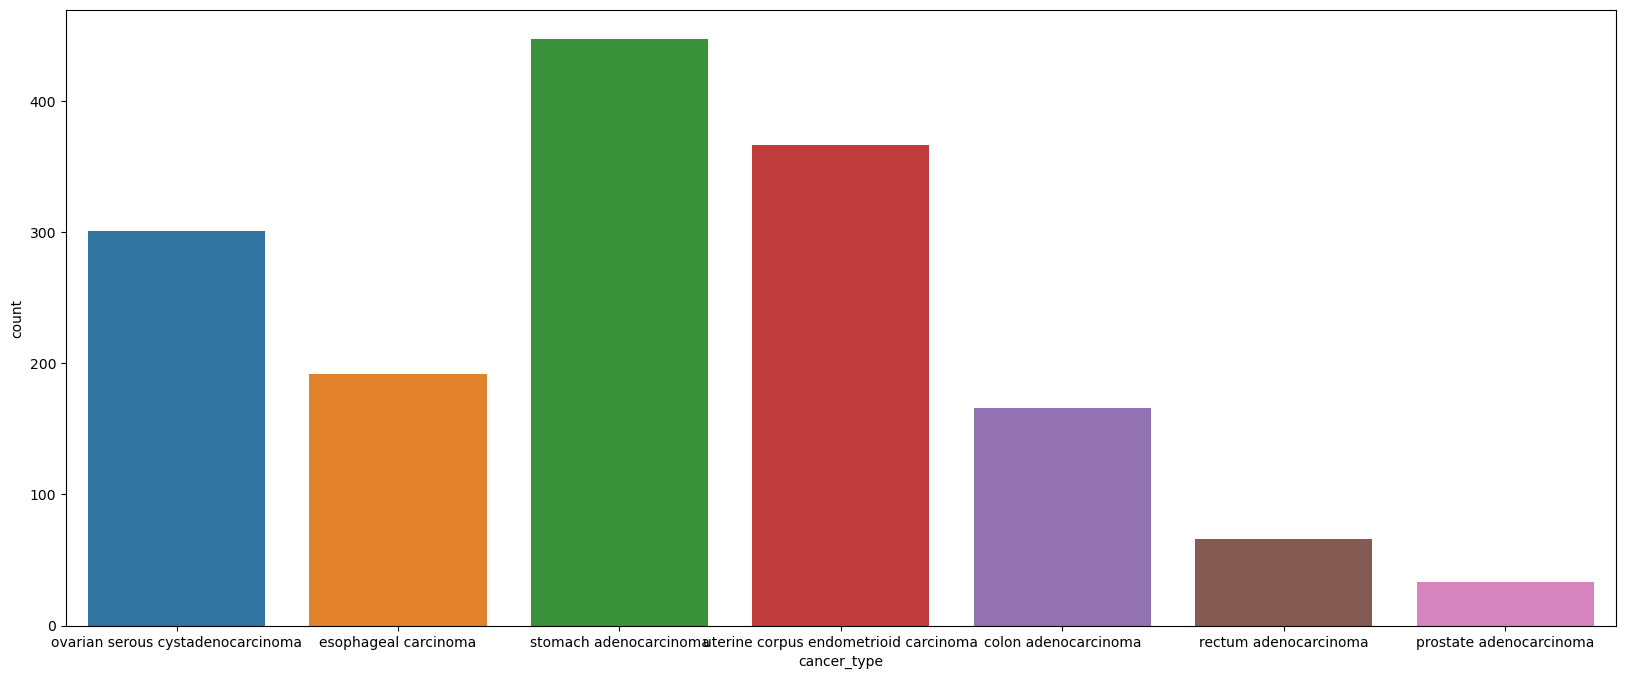

In [51]:

plt.figure(figsize=(20, 8))
sns.countplot(x= 'cancer_type', data = df_with_nan,hue='cancer_type')

plt.show()

## Class distribution 

<Axes: xlabel='cancer_type', ylabel='count'>

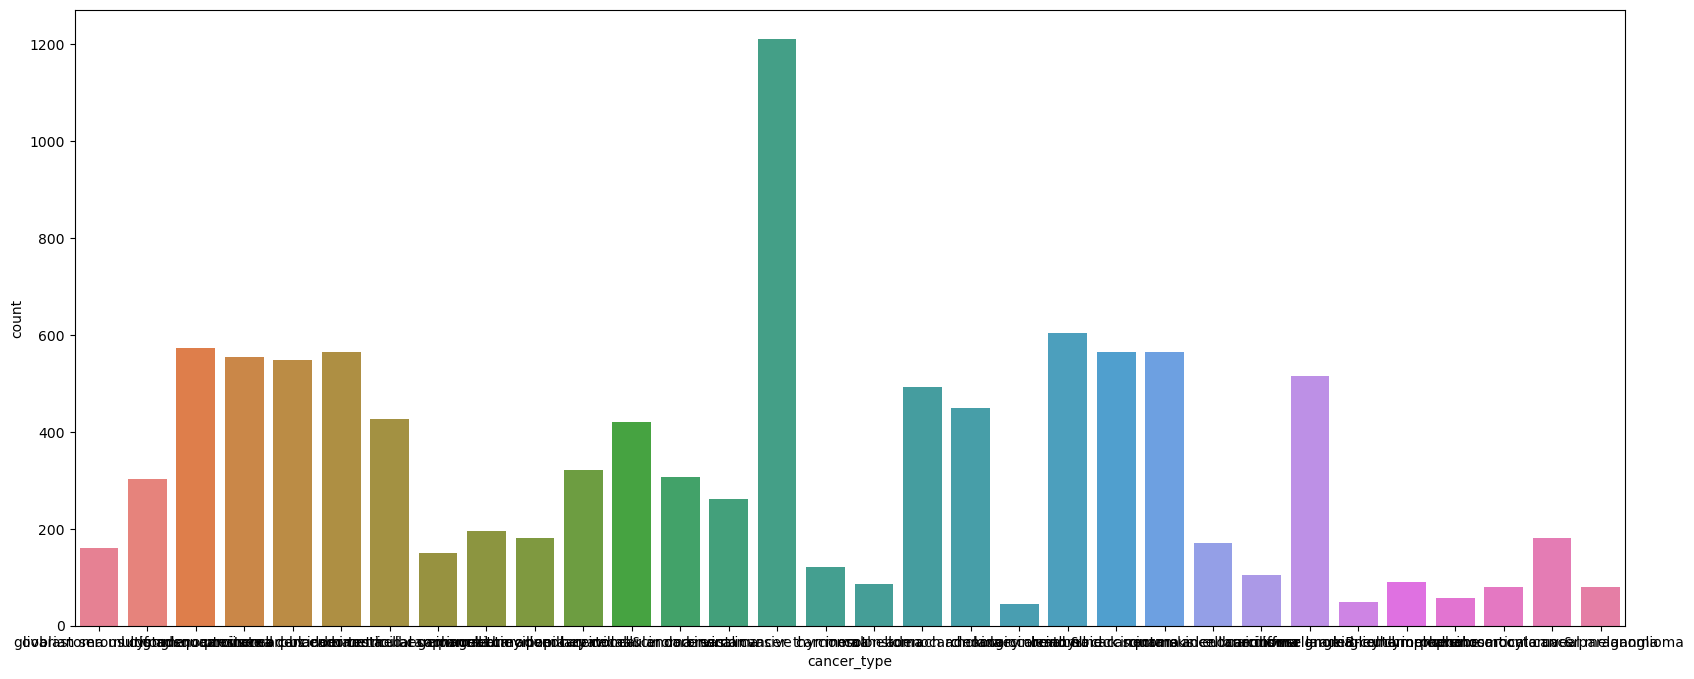

In [52]:
plt.figure(figsize=(20, 8))


sns.countplot(x= 'cancer_type', data = df,hue='cancer_type')


In [ ]:
df_cleaned = df.dropna() # drop all rows with missing values

In [54]:
df_cleaned.shape

(8870, 20534)

In [55]:
df_cleaned[df_cleaned['tumor_status'] == 'Primary Tumor'].shape[0]

8188

<Axes: xlabel='cancer_type', ylabel='count'>

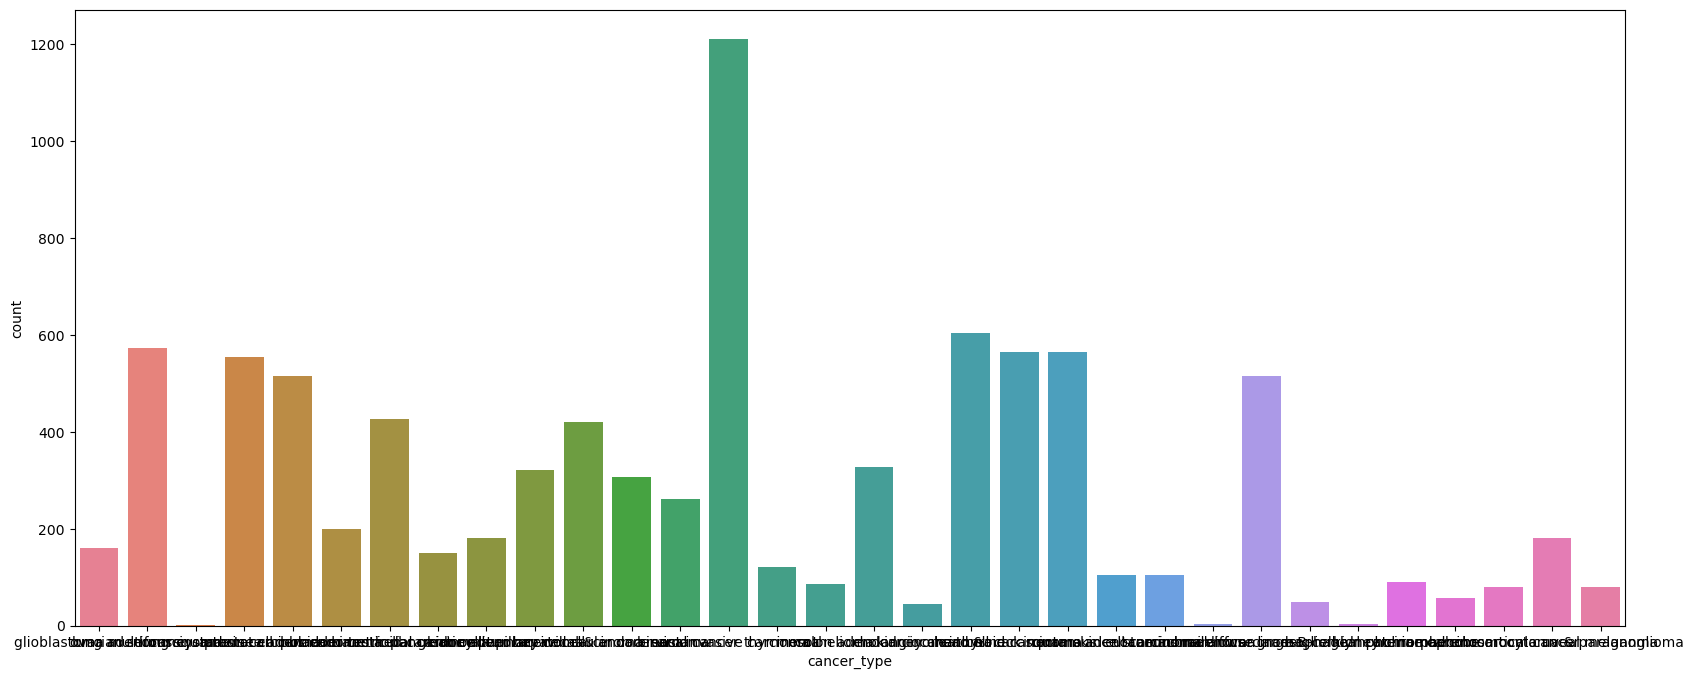

In [56]:
plt.figure(figsize=(20, 8))


sns.countplot(x= 'cancer_type', data = df_cleaned,hue='cancer_type')


In [57]:
sum(df_cleaned.dtypes == 'object')

3

In [58]:
df_cleaned.shape

(8870, 20534)

## Describe Columns 

In [59]:
numeric_df = df_cleaned.select_dtypes(include='float')

In [60]:
numeric_df.describe()

,100130426,100133144,100134869,10357,10431,136542,155060,26823,280660,317712,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
count,8870.000000,8870.000000,8870.000000,8870.000000,8870.000000,8870.000000,8870.000000,8870.000000,8870.000000,8870.000000,...,8870.000000,8870.000000,8870.000000,8870.000000,8870.000000,8870.000000,8870.000000,8870.000000,8870.000000,8870.000000
mean,0.030108,2.891231,3.145581,6.847078,9.820238,0.000683,7.443746,0.491141,0.099063,0.001611,...,8.291499,8.709920,5.563802,8.498001,10.055851,3.863590,9.740720,11.889325,10.136988,9.427484
std,0.150695,1.353771,1.153339,0.741045,0.542621,0.019641,1.158562,0.553641,0.483183,0.067546,...,0.998272,1.478143,0.879989,0.714573,0.442797,2.664965,0.647815,0.885570,0.646556,0.560376
min,0.000000,0.000000,0.000000,0.000000,7.870000,0.000000,2.130000,0.000000,0.000000,0.000000,...,4.380000,2.500000,0.000000,0.710000,7.770000,0.000000,6.410000,7.140000,7.040000,6.680000
25%,0.000000,2.060000,2.420000,6.360000,9.450000,0.000000,6.680000,0.000000,0.000000,0.000000,...,7.520000,7.560000,5.060000,8.090000,9.800000,1.270000,9.320000,11.340000,9.760000,9.100000
50%,0.000000,3.010000,3.190000,6.840000,9.800000,0.000000,7.470000,0.420000,0.000000,0.000000,...,8.280000,8.815000,5.660000,8.520000,10.070000,4.065000,9.730000,11.920000,10.200000,9.450000
75%,0.000000,3.850000,3.920000,7.330000,10.160000,0.000000,8.220000,0.840000,0.000000,0.000000,...,9.060000,9.920000,6.170000,8.920000,10.330000,6.110000,10.170000,12.460000,10.580000,9.780000
max,4.250000,7.480000,6.770000,10.130000,12.290000,1.010000,12.230000,4.550000,6.310000,4.070000,...,12.430000,12.780000,8.100000,12.130000,12.220000,13.140000,14.360000,15.430000,13.080000,13.000000


## Check the Distribution of genes 

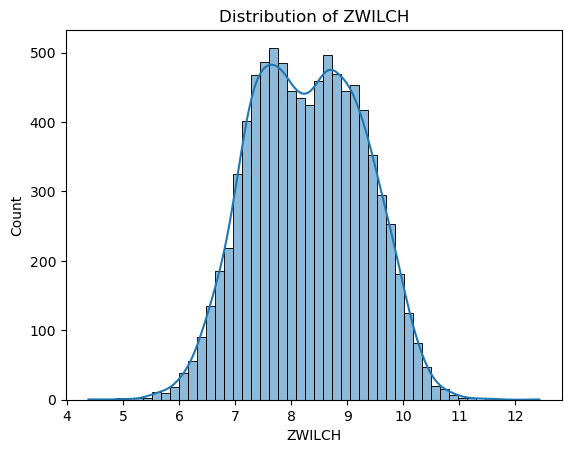

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt


gene_to_check = 'ZWILCH' 

sns.histplot(data=numeric_df, x=gene_to_check, bins=50, kde=True)
plt.title(f'Distribution of {gene_to_check}')
plt.show()

In [62]:
gene_means = numeric_df.mean(axis=0)
gene_stds = numeric_df.std(axis=0)

## Fliter the genes

In [63]:
genes_to_keep_mask = (gene_means >= 0.5) & (gene_stds >= 0.8)

# Apply the mask to get the final, filtered DataFrame
final_df = numeric_df.loc[:, genes_to_keep_mask]

print("Shape of DataFrame after filtering:", final_df.shape)
print("\nFinal filtered DataFrame (only gene_C should remain):")
print(final_df.head())

Shape of DataFrame after filtering: (8870, 12854)

Final filtered DataFrame (only gene_C should remain):
   100133144  100134869  155060  340602  388795  390284  553137  57714  \
0       2.03       2.96    7.87    2.03    0.00    1.16     0.0   9.07   
1       0.00       4.06    7.35    0.00    1.42    2.30     0.0   7.96   
2       1.98       3.90    7.09    0.88    0.00    1.43     0.0   7.43   
3       4.09       4.00    8.71    1.54    0.97    0.97     0.0   7.09   
4       2.71       2.54    8.11    1.15    1.15    1.15     0.0   8.48   

   645851  652919  ...  ZSCAN4  ZSCAN5B  ZSWIM4  ZSWIM5  ZSWIM6  ZWILCH  \
0    4.53    4.43  ...    1.16     1.16    8.07    8.75    9.51    8.03   
1    3.61    2.62  ...    0.64     0.64    9.51    5.67    9.13    8.87   
2    4.70    0.00  ...    0.51     0.88    9.39    7.79    8.87    9.42   
3    5.55    0.00  ...    0.97     0.97    8.83    7.89    9.46    8.79   
4    3.43    0.00  ...    0.69     0.00    8.00    6.64    8.66    7.39   


In [64]:
to_attach = df_cleaned.select_dtypes(include=['object'])

In [65]:
final_df = pd.concat([final_df,to_attach ], axis=1)

In [66]:
final_df.head()

,100133144,100134869,155060,340602,388795,390284,553137,57714,645851,652919,...,ZSWIM5,ZSWIM6,ZWILCH,ZWINT,ZXDA,ZYG11A,ZYX,sample,tumor_status,cancer_type
0,2.03,2.96,7.87,2.03,0.00,1.16,0.0,9.07,4.53,4.43,...,8.75,9.51,8.03,8.66,6.05,0.69,11.92,TCGA-02-0047-01,Primary Tumor,glioblastoma multiforme
1,0.00,4.06,7.35,0.00,1.42,2.30,0.0,7.96,3.61,2.62,...,5.67,9.13,8.87,7.95,5.45,2.60,13.49,TCGA-02-0055-01,Primary Tumor,glioblastoma multiforme
2,1.98,3.90,7.09,0.88,0.00,1.43,0.0,7.43,4.70,0.00,...,7.79,8.87,9.42,9.39,4.35,5.50,12.31,TCGA-02-2483-01,Primary Tumor,glioblastoma multiforme
3,4.09,4.00,8.71,1.54,0.97,0.97,0.0,7.09,5.55,0.00,...,7.89,9.46,8.79,8.79,5.78,0.00,12.31,TCGA-02-2485-01,Primary Tumor,glioblastoma multiforme
4,2.71,2.54,8.11,1.15,1.15,1.15,0.0,8.48,3.43,0.00,...,6.64,8.66,7.39,6.24,5.03,0.00,12.93,TCGA-02-2486-01,Primary Tumor,glioblastoma multiforme


## Gene Heat Map

/opt/anaconda3/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


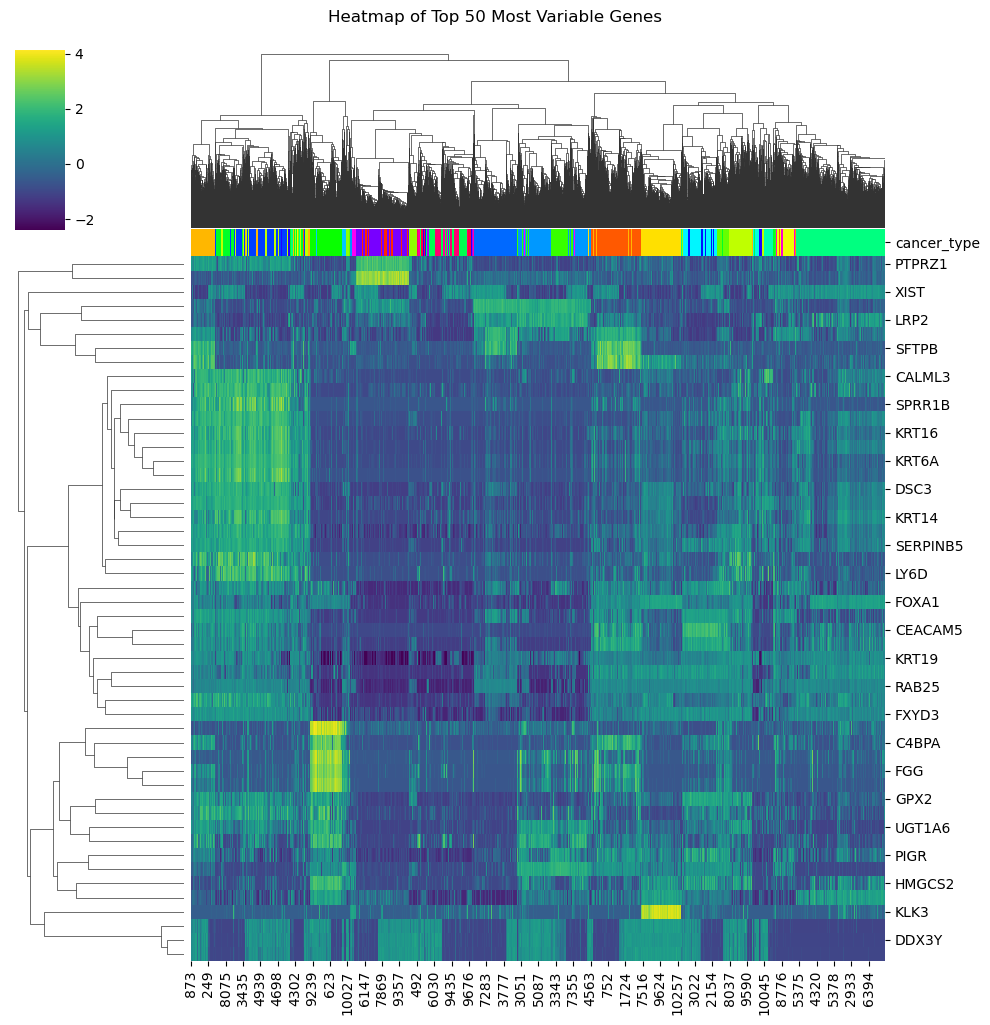

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



for_plot_df = final_df.select_dtypes(include='float')
# Find the top 100 most variable genes
top_100_genes = for_plot_df.var(axis=0).sort_values(ascending=False).head(50).index
heatmap_data = final_df[top_100_genes]

# Create a color map for annotations
unique_cancer_types = final_df['cancer_type'].unique()
palette = sns.color_palette("hsv", len(unique_cancer_types))
color_map = dict(zip(unique_cancer_types, palette))
row_colors = final_df.loc[heatmap_data.index, 'cancer_type'].map(color_map)

# Create the clustermap
# z_score=0 scales each gene's expression to its own mean and standard deviation
g = sns.clustermap(heatmap_data.T, # Transpose so genes are rows
                   z_score=0, 
                   cmap='viridis', 
                   col_colors=row_colors)

g.fig.suptitle('Heatmap of Top 50 Most Variable Genes', y=1.02)
plt.show()

In [68]:
top_100_genes

Index(['KRT5', 'KRT6A', 'KRT14', 'RPS4Y1', 'XIST', 'SFTPB', 'CEACAM5', 'KRT6B',
       'CEACAM6', 'KRT16', 'AGR2', 'SLC34A2', 'KRT13', 'KRT17', 'DSG3',
       'HMGCS2', 'KRT6C', 'FGG', 'CALML3', 'KRT15', 'PIGR', 'FGA', 'SERPINB5',
       'GPX2', 'DDX3Y', 'UGT1A6', 'AZGP1', 'TMPRSS4', 'FXYD3', 'SFTPA2', 'ALB',
       'KRT19', 'DSC3', 'FGB', 'KCNJ16', 'FOXA1', 'PTPRZ1', 'KDM5D', 'GSTA1',
       'LY6D', 'GFAP', 'SPRR1B', 'AKR1B10', 'KLK3', 'LCN2', 'CLCA2', 'LRP2',
       'HNF1B', 'RAB25', 'C4BPA'],
      dtype='object')

<Axes: xlabel='cancer_type', ylabel='count'>

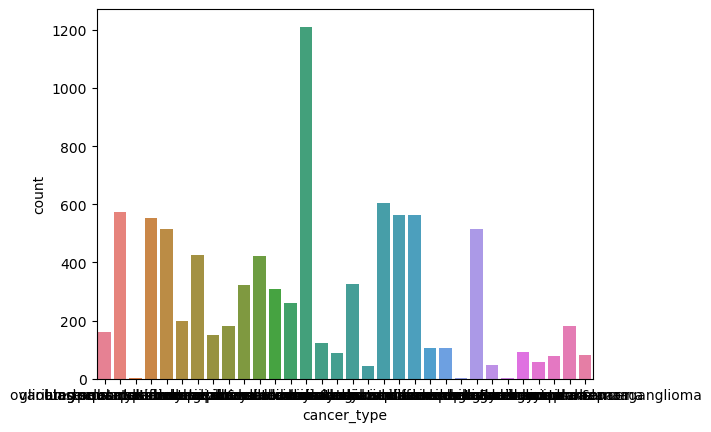

In [69]:
sns.countplot(x= 'cancer_type', data = final_df,hue='cancer_type')

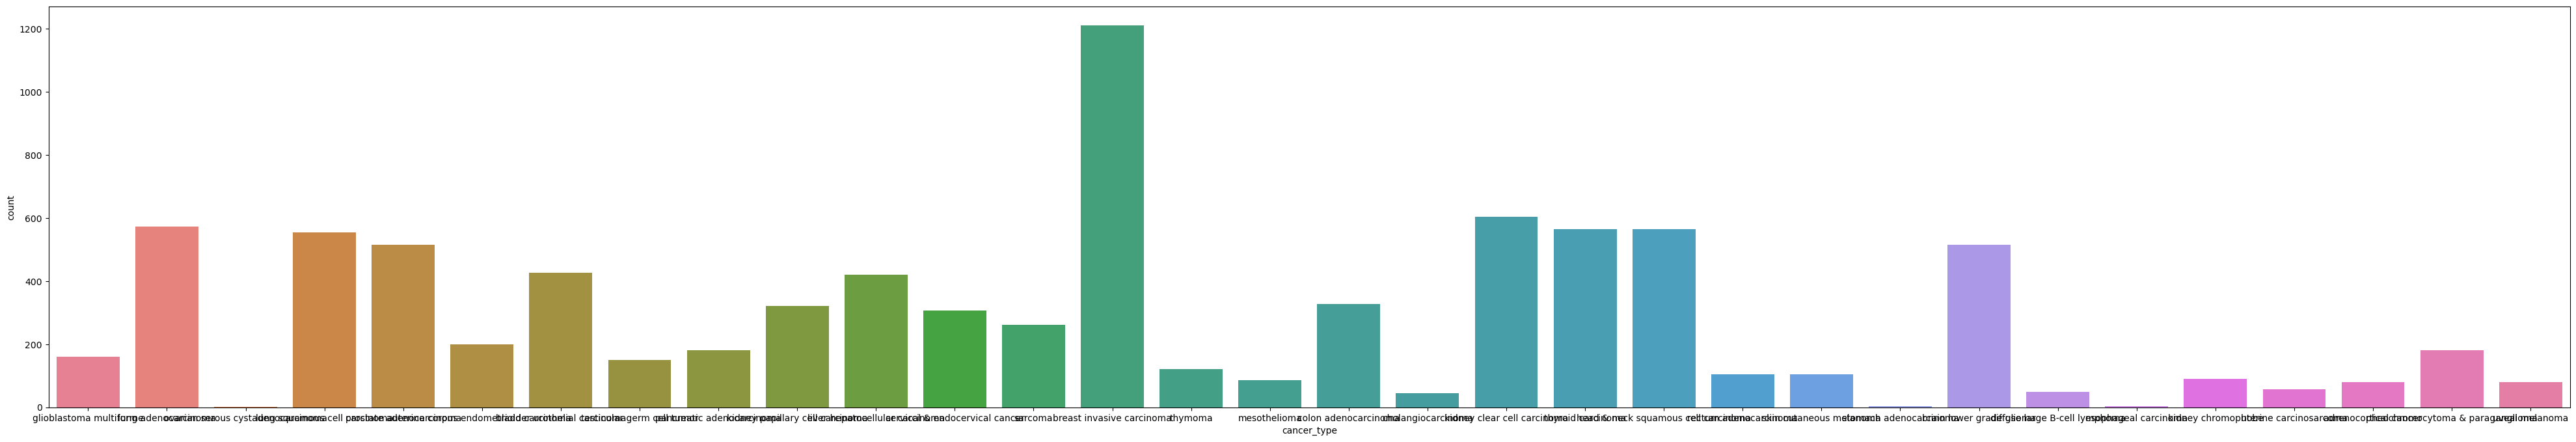

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(50, 8))

sns.countplot(x= 'cancer_type', data = final_df,hue='cancer_type')
plt.show()

In [71]:
final_df.shape

(8870, 12857)

## PCA plot for Cancer type

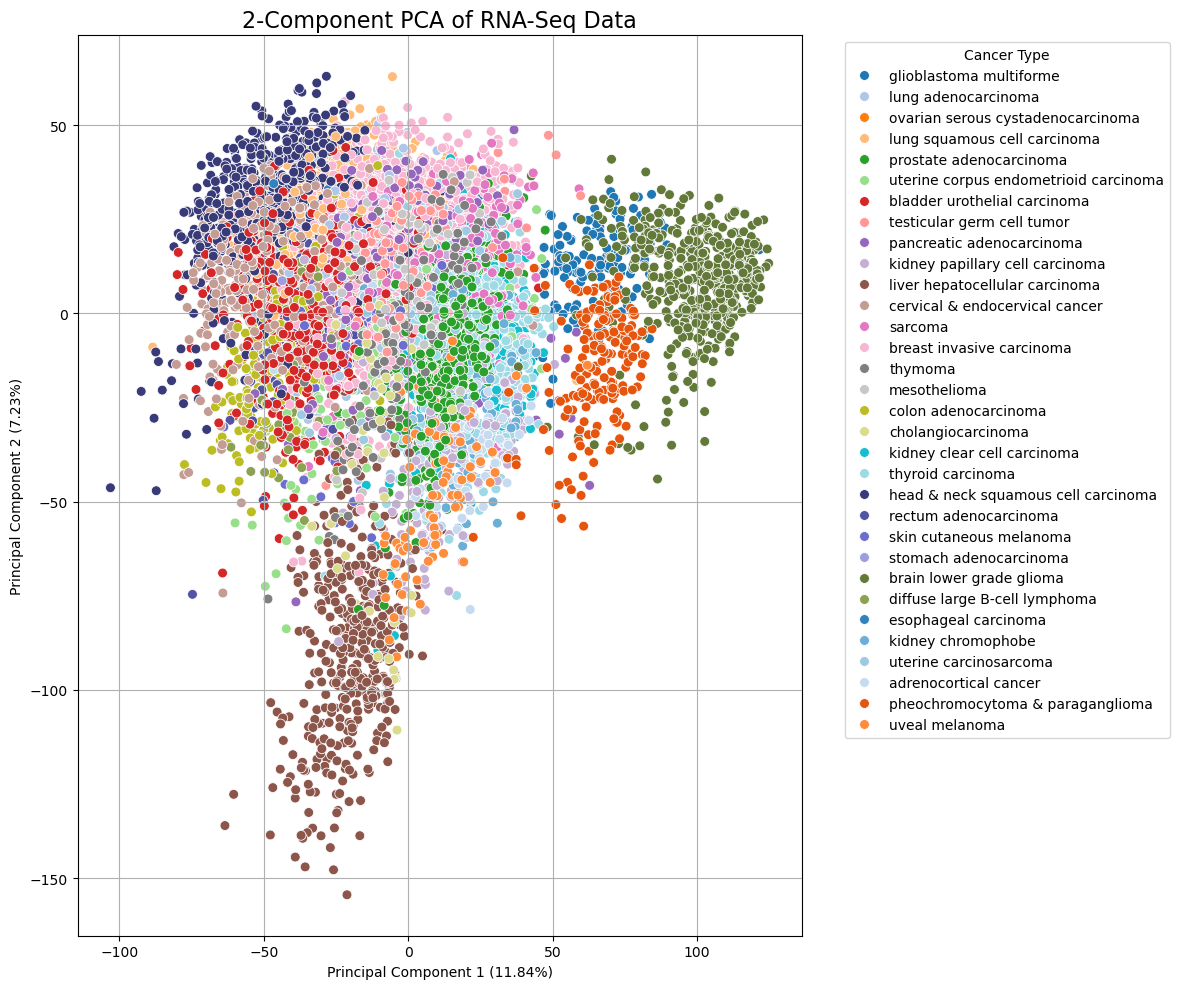

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


x = final_df.select_dtypes(include=np.number).values
y_labels = final_df.loc[:, 'cancer_type']



scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)



pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_scaled)



# Generate a color palette with 32 distinct colors
palette = sns.color_palette("tab20", 20) + sns.color_palette("tab20b", 6) + sns.color_palette("tab20c", 6)
palette = palette[:32]  # ensure exactly 32


# Create a new DataFrame with the principal components.
principal_df = pd.DataFrame(data=principalComponents,
                           columns=['PC1', 'PC2'],
                           index=final_df.index) # Keep the original index


pca_df = pd.concat([principal_df, y_labels], axis=1)



plt.figure(figsize=(12, 10))

# Create a scatter plot using seaborn.
# `hue` will color the points based on the 'cancer_type'.
sns.scatterplot(x='PC1', y='PC2',
                hue='cancer_type',
                data=pca_df,
                palette=palette,
                s=50) # s sets the marker size


explained_var_pc1 = pca.explained_variance_ratio_[0] * 100
explained_var_pc2 = pca.explained_variance_ratio_[1] * 100
plt.xlabel(f'Principal Component 1 ({explained_var_pc1:.2f}%)')
plt.ylabel(f'Principal Component 2 ({explained_var_pc2:.2f}%)')

plt.title('2-Component PCA of RNA-Seq Data', fontsize=16)
plt.legend(title='Cancer Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout() 
plt.show()


In [73]:
cancer_type_counts = final_df['cancer_type'].value_counts()

In [74]:
cancer_type_counts.sort_values(ascending=True)

cancer_type
ovarian serous cystadenocarcinoma           2
stomach adenocarcinoma                      3
esophageal carcinoma                        3
cholangiocarcinoma                         45
diffuse large B-cell lymphoma              48
uterine carcinosarcoma                     57
adrenocortical cancer                      79
uveal melanoma                             80
mesothelioma                               87
kidney chromophobe                         91
skin cutaneous melanoma                   104
rectum adenocarcinoma                     104
thymoma                                   122
testicular germ cell tumor                150
glioblastoma multiforme                   161
pancreatic adenocarcinoma                 182
pheochromocytoma & paraganglioma          182
uterine corpus endometrioid carcinoma     200
sarcoma                                   261
cervical & endocervical cancer            308
kidney papillary cell carcinoma           322
colon adenocarcinoma  

In [75]:
final_df['tumor_status'].value_counts()

tumor_status
Primary Tumor          8188
Solid Tissue Normal     682
Name: count, dtype: int64

In [76]:
print(final_df.shape)

(8870, 12857)


In [77]:
final_df['tumor_status'].value_counts()

tumor_status
Primary Tumor          8188
Solid Tissue Normal     682
Name: count, dtype: int64

In [ ]:
final_df.to_csv('rna_seq_with_column_names.csv', index=False)